# **Exploratory Data Analysis**

## **Download Dataset**

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d irkaal/foodcom-recipes-and-reviews

In [ ]:
!unzip /content/foodcom-recipes-and-reviews.zip

## **Import Library**

In [1]:
# Data loading and data analysis
import pandas as pd

# Data preprocessing
import numpy as np
import re

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
import scipy.stats as stats
from wordcloud import WordCloud

# import tensorflow as tf

## **Dataset Information**

In [2]:
# Load dataset recipes.csv
data = pd.read_csv('/content/recipes.csv')

In [3]:
# Show dataset
data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [4]:
# Show information dataset
print(f'Data consist of {data.shape[1]} columns')
print(f'Each column consists of {data.shape[0]} records')

Data consist of 28 columns
Each column consists of 522517 records


In [5]:
# Show column name from dataset
column_headers = list(data.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime', 'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeYield', 'RecipeInstructions']


In [6]:
# Show variables info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

**A description of the variables in the dataset :**


* RecipeId : Id from Recipe.
* Name AuthorId : Recipe creator's Id.
* AuthorName : Recipe creator's name.
* CookTime : Cooking time in minutes.
* PrepTime : Preparation time in minutes.
* TotalTime : Total prep and cook time in minutes.
* DatePublished : Date the recipe was published.
* Description : Description of the recipe made.
* Images : Picture of a food recipe.
* RecipeCategory : Categories of food recipes.
* Keywords : Keyword from food recipe.
* RecipeIngredientQuantities : Number of ingredients in the recipe.
* RecipeIngredientParts : Types of cooking ingredients in food recipes.
* AggregatedRating : Rate food recipes from reviews.
* ReviewCount : Number of reviews of food recipes made.
* Calories : Amount of calories in food recipes.
* FatContent : Amount of fat in food recipes.
* SaturatedFatContent : Amount of SaturatedFat in food recipes.
* CholesterolContent : Amount of Cholesterol in food recipes.
* SodiumContent : Amount of Sodium in food recipes.
* CarbohydrateContent : Amount of Carbohydrate in food recipes.
* FiberContent : Amount of Fiber in food recipes.
* SugarContent : Amount of Sugar in food recipes.
* ProteinContent : Amount of Protein in food recipes.
* RecipeServings : Food recipe portions.
* RecipeYield : Product results obtained from food recipes.
* RecipeInstructions : How to make from food recipes.




**The variables that we will use in this project:**

['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']

In [7]:
# Select the required column
dataset=data.copy()
columns=['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']
dataset=dataset[columns]

## **Data Visualization**

In [8]:
dataset.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,PT25M,PT4H,PT4H25M,"c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,PT5M,PT30M,PT35M,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."


In [9]:
dataset["RecipeIngredientParts"].head(100)

0     c("blueberries", "granulated sugar", "vanilla ...
1     c("saffron", "milk", "hot green chili peppers"...
2     c("sugar", "lemons, rind of", "lemon, zest of"...
3     c("extra firm tofu", "eggplant", "zucchini", "...
4     c("plain tomato juice", "cabbage", "onion", "c...
                            ...                        
95    c("DOLE&reg; Banana", "sugar", "margarine", "e...
96    c("cherry tomatoes", "scallions", "parsley", "...
97    c("chicken breasts", "olive oil", "Velveeta ch...
98    c("butter", "sugar", "egg", "flour", "baking p...
99    c("all-purpose flour", "salt", "unsalted butte...
Name: RecipeIngredientParts, Length: 100, dtype: object

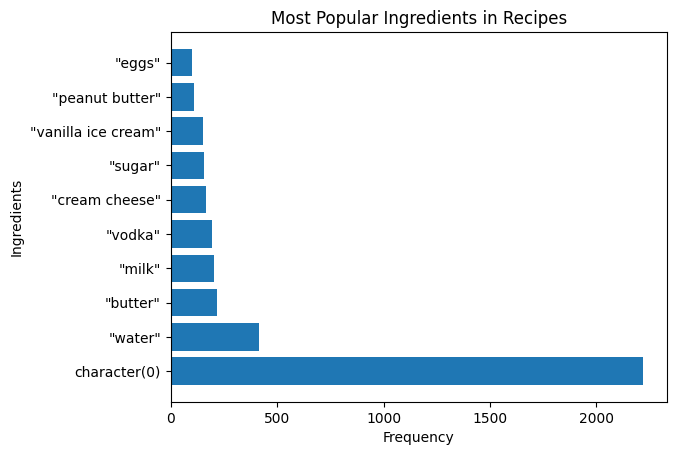

In [10]:
popular_ingredients = dataset["RecipeIngredientParts"].value_counts().head(10)

# Create a bar chart
plt.barh(popular_ingredients.index, popular_ingredients.values)
plt.xlabel("Frequency")
plt.ylabel("Ingredients")
plt.title("Most Popular Ingredients in Recipes")
plt.show()

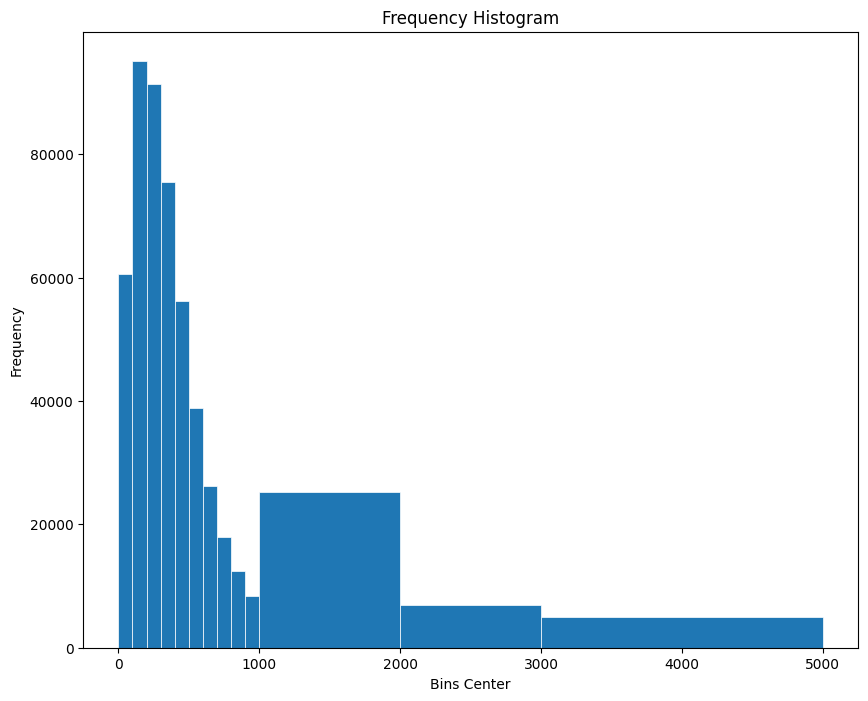

In [11]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the title and axis labels
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')

# Define the bin ranges
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1000, 2000, 3000, 5000]

# Create the histogram
ax.hist(dataset.Calories.to_numpy(), bins=bins, linewidth=0.5, edgecolor="white")

# Display the plot
plt.show()

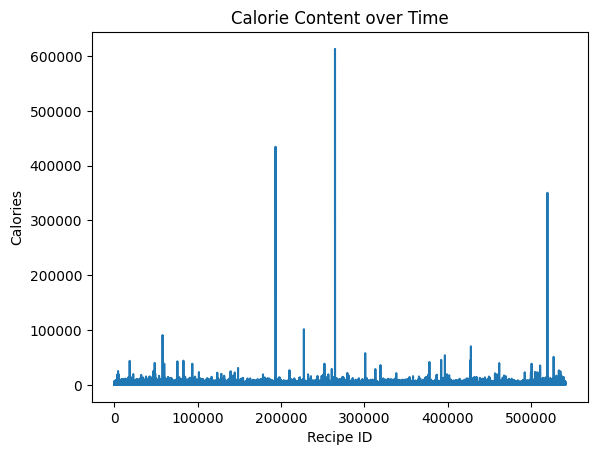

In [12]:
# Extract the recipe IDs and calorie content
recipe_ids = dataset['RecipeId']
calories = dataset['Calories']

# Create a line chart
plt.plot(recipe_ids, calories)
plt.xlabel('Recipe ID')
plt.ylabel('Calories')
plt.title('Calorie Content over Time')
plt.show()

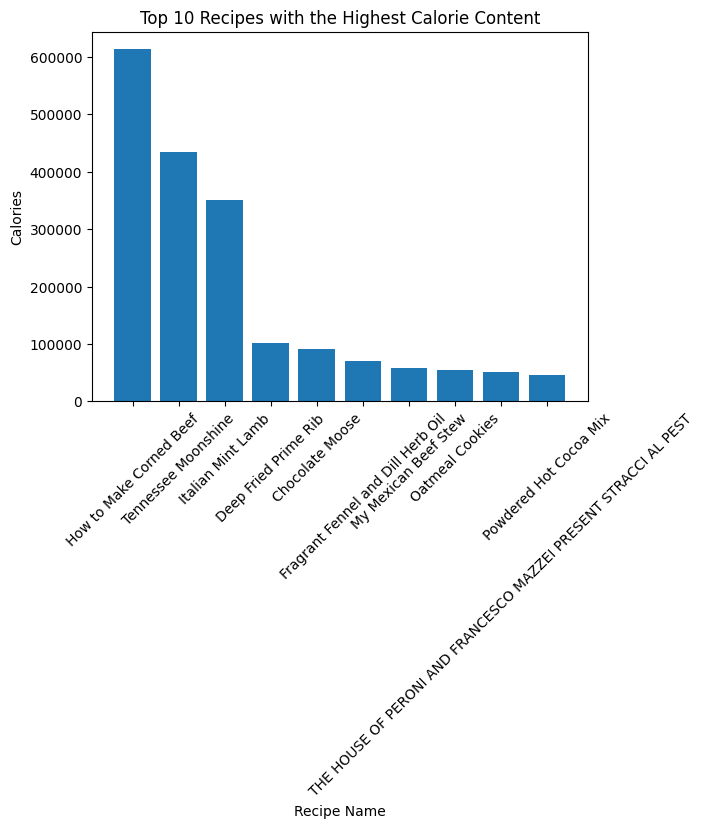

In [13]:
# Select the top N recipes with the highest calorie content
n = 10
top_calorie_recipes = dataset.nlargest(n, 'Calories')

# Create a bar chart
plt.bar(top_calorie_recipes['Name'], top_calorie_recipes['Calories'])
plt.xlabel('Recipe Name')
plt.ylabel('Calories')
plt.title(f'Top {n} Recipes with the Highest Calorie Content')
plt.xticks(rotation=45)
plt.show()

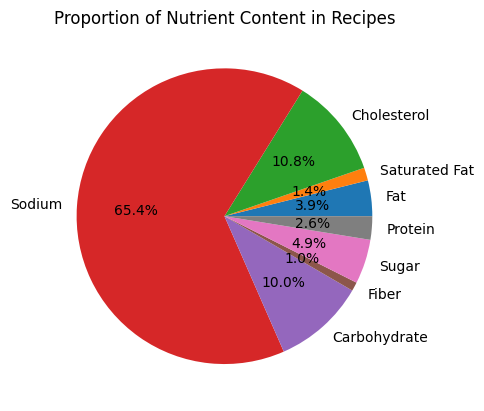

In [14]:
# Extract the nutrient content
fat_content = dataset['FatContent']
satfat_content = dataset['SaturatedFatContent']
chol_content = dataset['CholesterolContent']
sod_content = dataset['SodiumContent']
carb_content = dataset['CarbohydrateContent']
fib_content = dataset['FiberContent']
sug_content = dataset['SugarContent']
protein_content = dataset['ProteinContent']

# Calculate the total nutrient content
total_content = fat_content + satfat_content + chol_content + sod_content + carb_content + fib_content + sug_content + protein_content

# Calculate the proportion of each nutrient
fat_proportion = fat_content / total_content
satfat_proportion = satfat_content / total_content
chol_proportion = chol_content / total_content
sod_proportion = sod_content / total_content
carb_proportion = carb_content / total_content
fib_proportion = fib_content / total_content
sug_proportion = sug_content / total_content
protein_proportion = protein_content / total_content

# Create a pie chart
labels = ['Fat', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Carbohydrate', 'Fiber', 'Sugar', 'Protein']
sizes = [fat_proportion.mean(), satfat_proportion.mean(), chol_proportion.mean(), sod_proportion.mean(), carb_proportion.mean(), fib_proportion.mean(), sug_proportion.mean(), protein_proportion.mean()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Nutrient Content in Recipes')
plt.show()

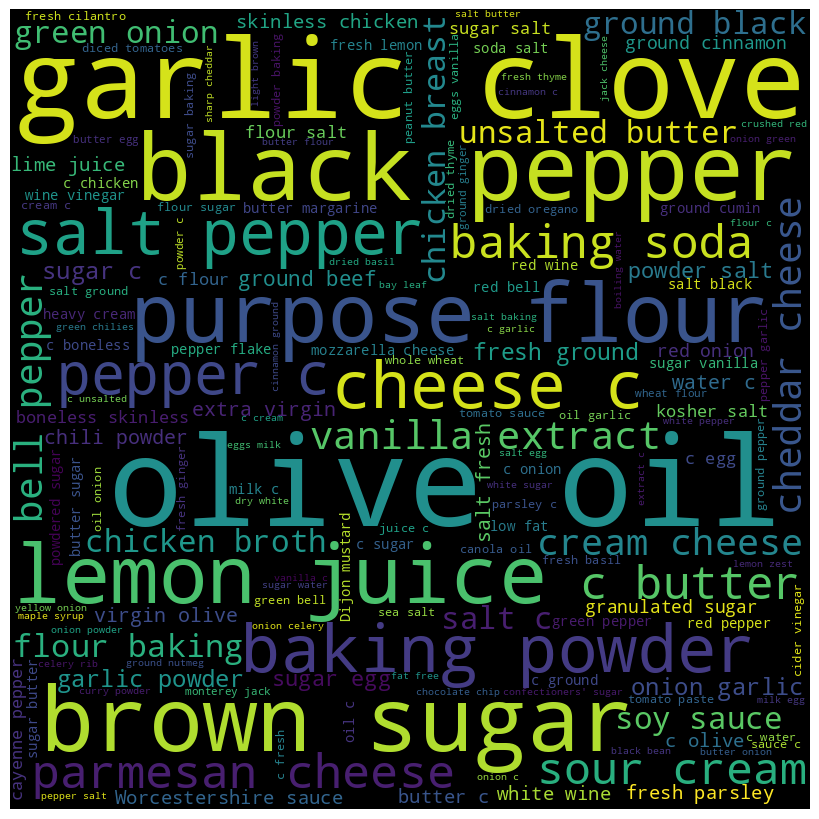

In [15]:
all_ingredients = ' '.join(dataset['RecipeIngredientParts'])

wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10, max_words=1000).generate(all_ingredients)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

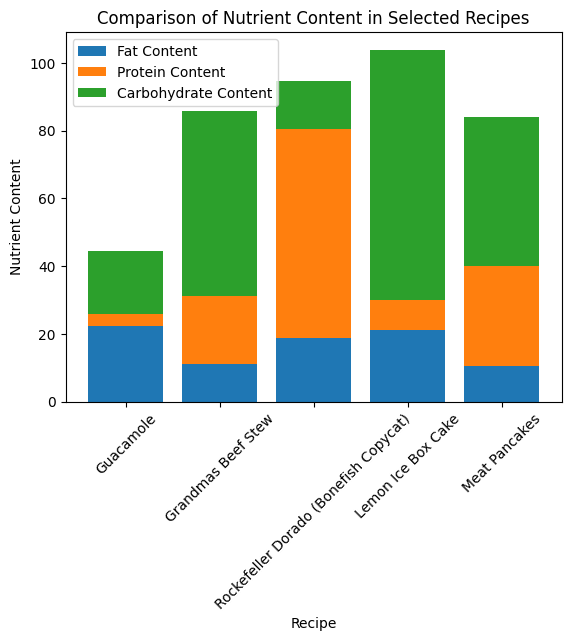

In [16]:
# Select a subset of recipes
selected_recipes = data.sample(n=5)

# Extract the nutrient content for selected recipes
recipe_names = selected_recipes['Name']
fat_content = selected_recipes['FatContent']
protein_content = selected_recipes['ProteinContent']
carb_content = selected_recipes['CarbohydrateContent']

# Create a stacked bar chart
plt.bar(recipe_names, fat_content, label='Fat Content')
plt.bar(recipe_names, protein_content, bottom=fat_content, label='Protein Content')
plt.bar(recipe_names, carb_content, bottom=fat_content+protein_content, label='Carbohydrate Content')
plt.xlabel('Recipe')
plt.ylabel('Nutrient Content')
plt.title('Comparison of Nutrient Content in Selected Recipes')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<ipython-input-17-e0cc6573f407>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = nutrition_data.corr()


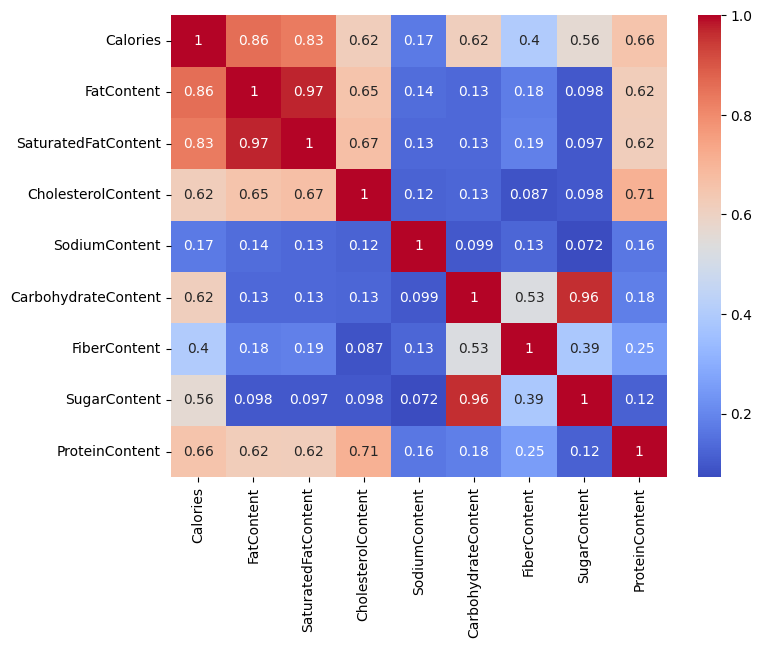

In [17]:
# Select relevant columns for correlation analysis
nutrition_columns = ['CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']
nutrition_data = data[nutrition_columns]

# Calculate correlation matrix
correlation_matrix = nutrition_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()